Recipe Cuisine
=====

> You've just joined the data team at an online publishing company. One of your verticals is a food publication. A product manager on your team wants to build a feature for this vertical that enables users to query by cuisine, not just by ingredients. Most of your recipes are unlabeled, and it's infeasible to label them by hand. Luckily, you have a small training set of about 10,000 recipes with labeled cuisines.

1. Design and execute a method to predict the cuisine of a recipe given only its ingredients. Data Due Diligence: All-Purpose Flour and Flour are likely the same ingredient, but red onions and yellow onions are incredibly different.

2. For each major cuisine, what are the driving ingredients that characterize it? What are the features of a cuisine that drive misclassification in your method above?

3. How could you design this to be robust enough to understand similarities / substitutions between ingredients? 

4. Your product manager indicates a likelihood that you will only need to write a guideline for an outsourced team to hand label the remaining corpus. How would you go about writing this guide for a few major cuisines?





## Index
1. Setup
2. Exploratory data Analysis / Data cleaning
3. Minimum viable model
4. Approach roadmap
5. Final results

## Setup 

In [16]:
# import general packages
import re
from collections import Counter, defaultdict

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *

# set figure resolution
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# load data
recipes = pd.read_json('recipies.json')

## Exploratory Data Analysis

In [2]:
# inspect data frame
recipes.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
# number of cuisines 
print(f'Number of cuisines: {len(set(recipes.cuisine))}\nNumber of recipes by cuisine:\n {Counter(recipes.cuisine)} \n\n')

# number of ingredients
all_ingredients = []
for ing_list in recipes.ingredients:
    all_ingredients.extend(ing_list)
print(f'Total number of Ingredients: {len(set(all_ingredients))}')

Number of cuisines: 20
Number of recipes by cuisine:
 Counter({'italian': 7838, 'mexican': 6438, 'southern_us': 4320, 'indian': 3003, 'chinese': 2673, 'french': 2646, 'cajun_creole': 1546, 'thai': 1539, 'japanese': 1423, 'greek': 1175, 'spanish': 989, 'korean': 830, 'vietnamese': 825, 'moroccan': 821, 'british': 804, 'filipino': 755, 'irish': 667, 'jamaican': 526, 'russian': 489, 'brazilian': 467}) 


Total number of Ingredients: 6714


## Get top ingredients by cuisine

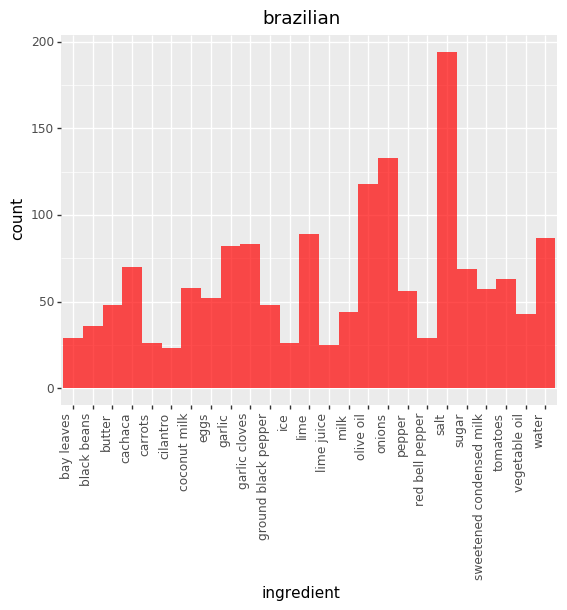

<ggplot: (8787760517129)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: brazilian.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


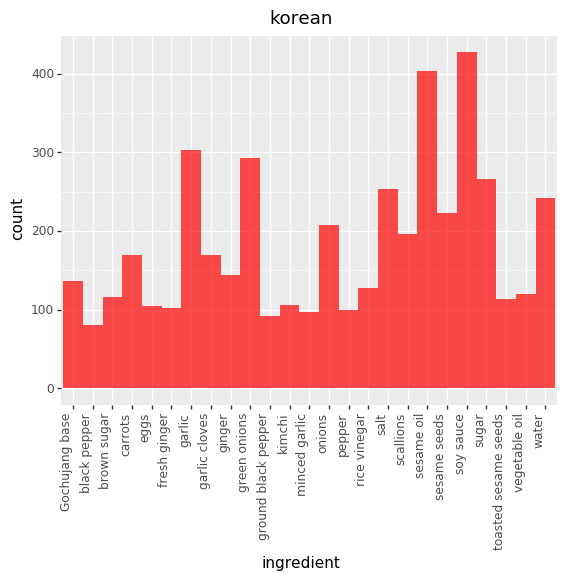

<ggplot: (8787760160517)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: korean.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


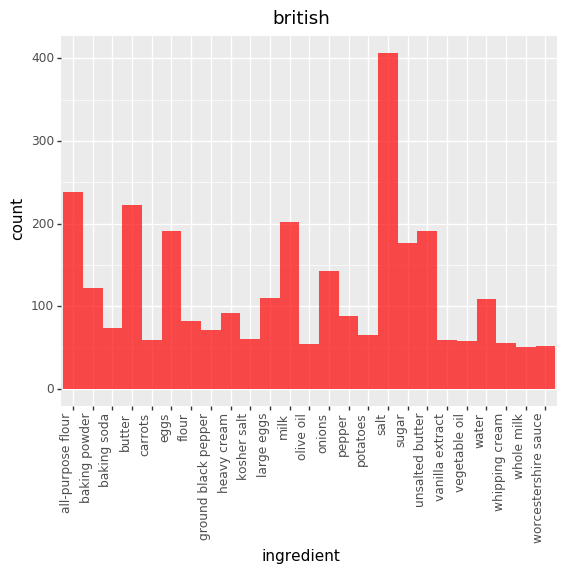

<ggplot: (8787874710065)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: british.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


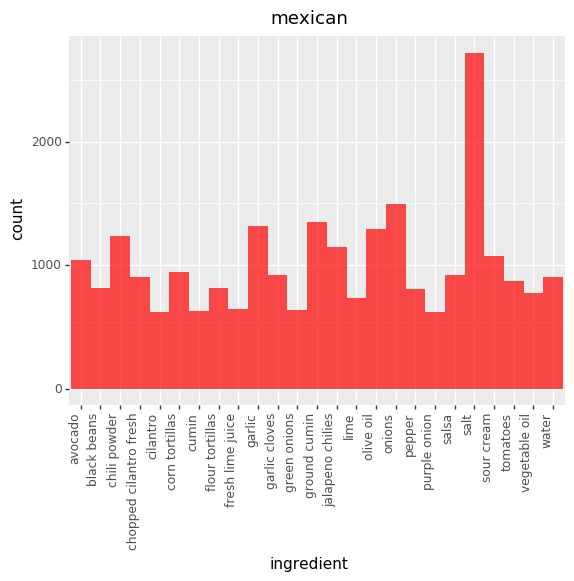

<ggplot: (8787880141065)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: mexican.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


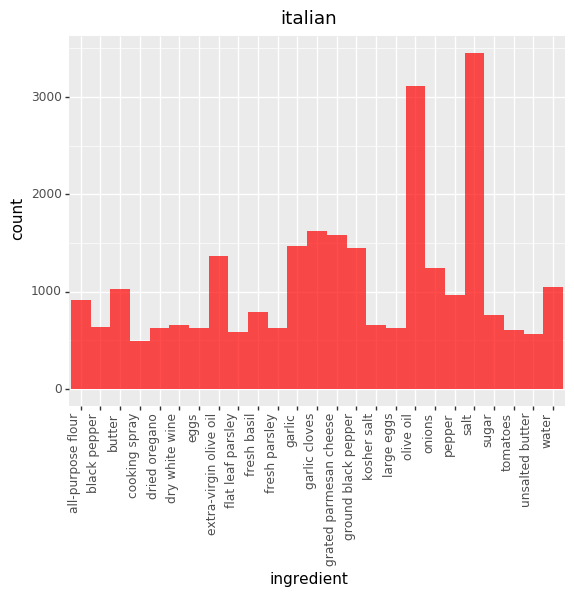

<ggplot: (8787759849837)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: italian.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


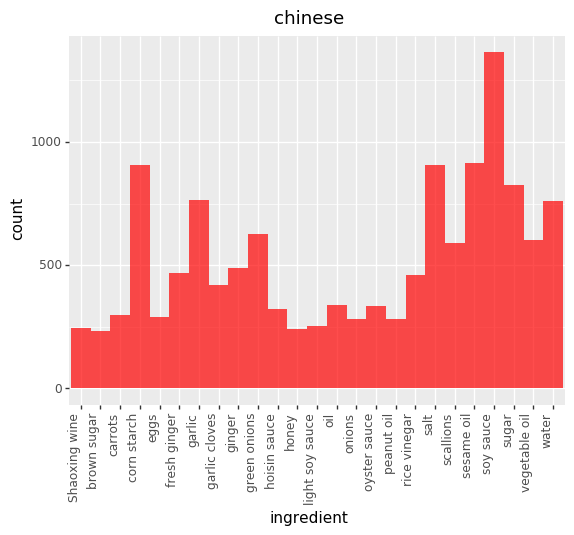

<ggplot: (8787759790785)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: chinese.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


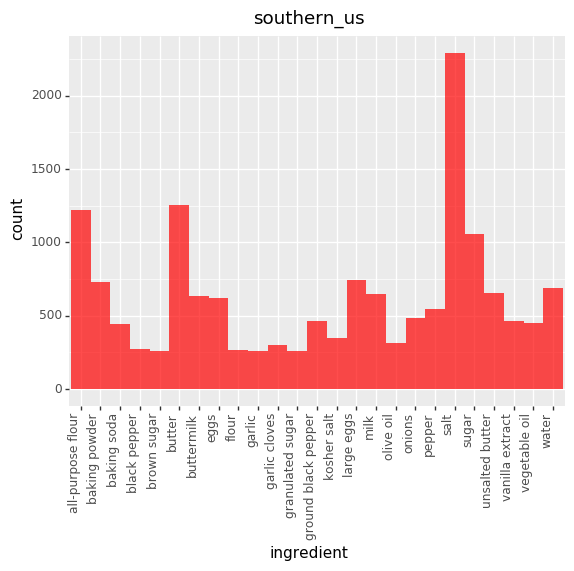

<ggplot: (8787759701525)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: southern_us.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


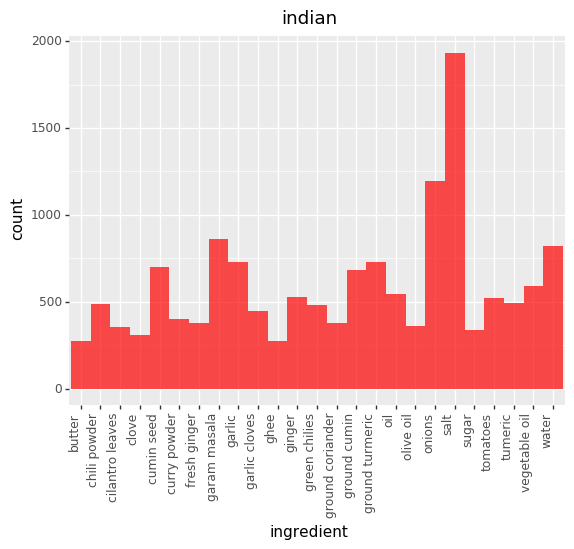

<ggplot: (8787759379885)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: indian.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


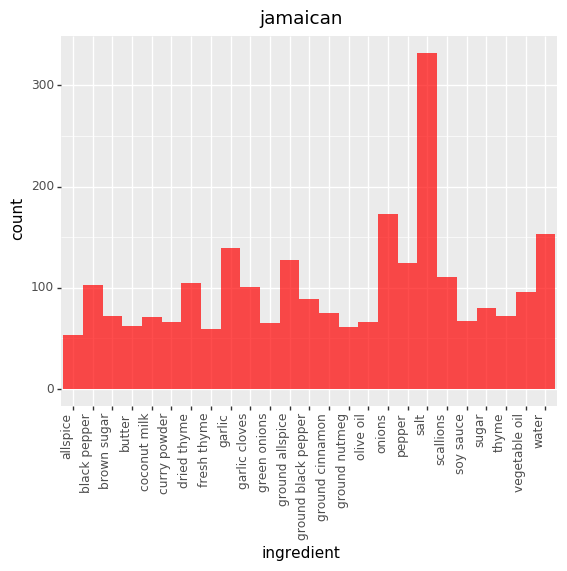

<ggplot: (8787759381853)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: jamaican.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


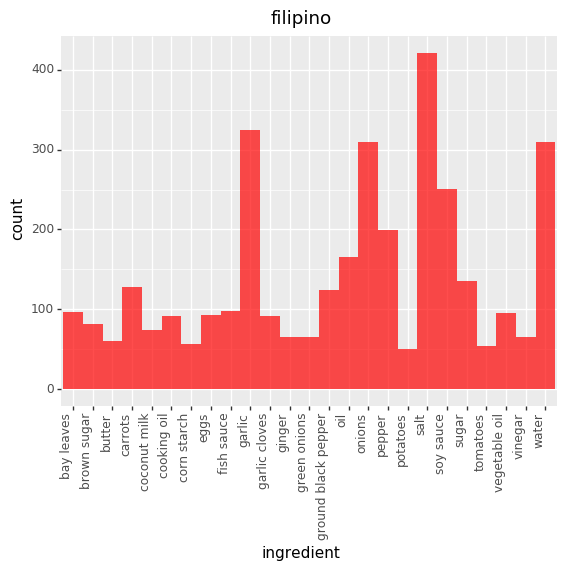

<ggplot: (8787759153989)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: filipino.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


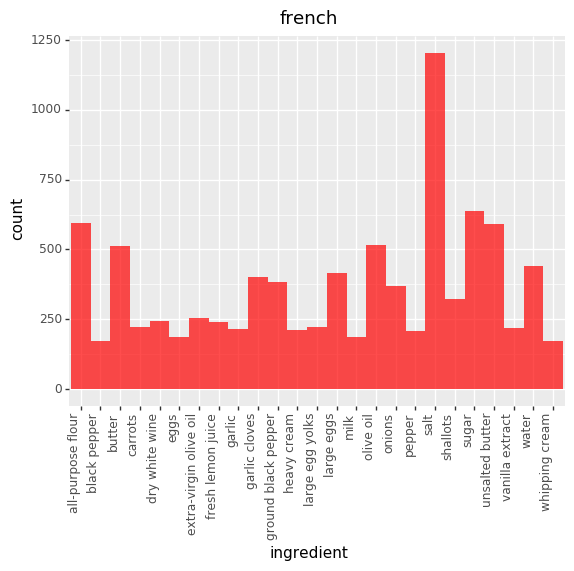

<ggplot: (8787759010317)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: french.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


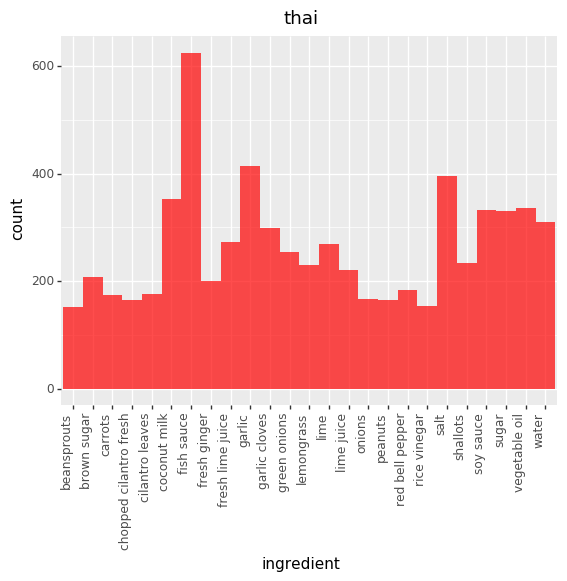

<ggplot: (8787754492849)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: thai.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


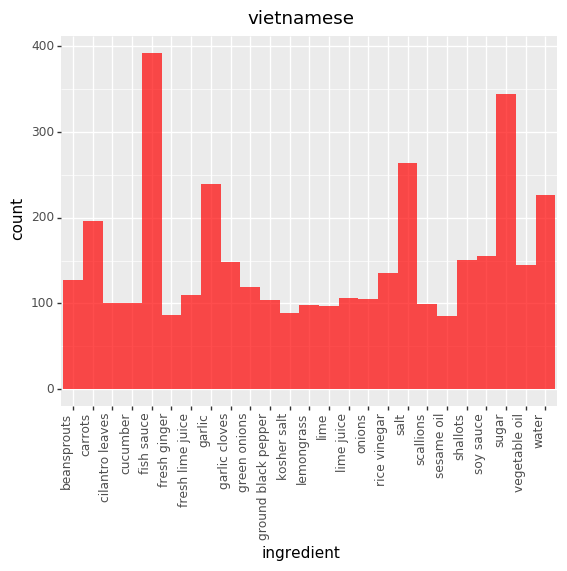

<ggplot: (8787754416585)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: vietnamese.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


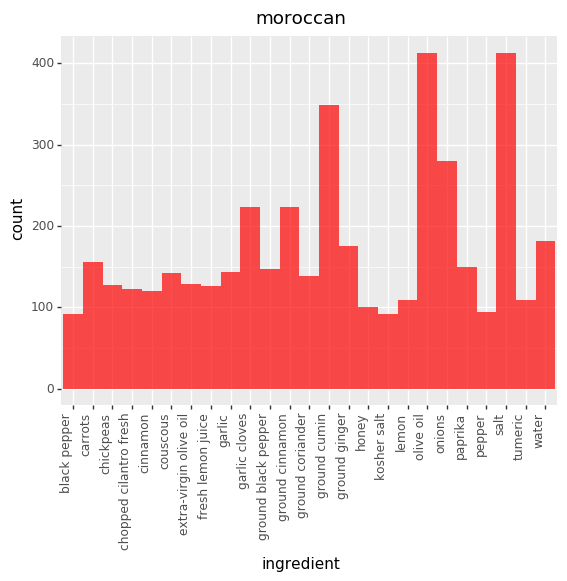

<ggplot: (8787754133305)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: moroccan.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


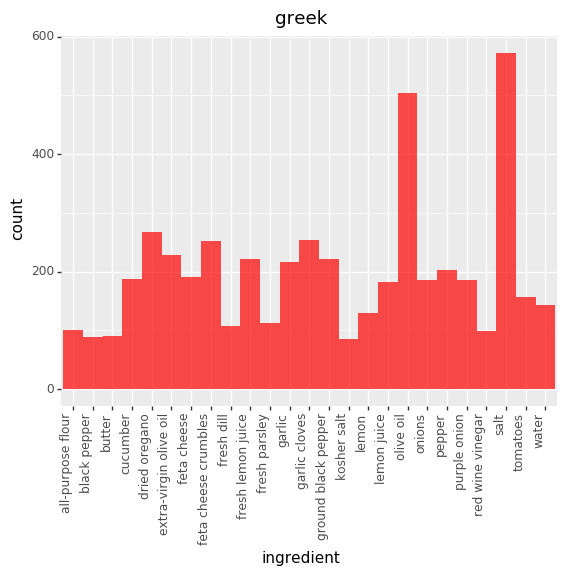

<ggplot: (8787753931849)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: greek.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


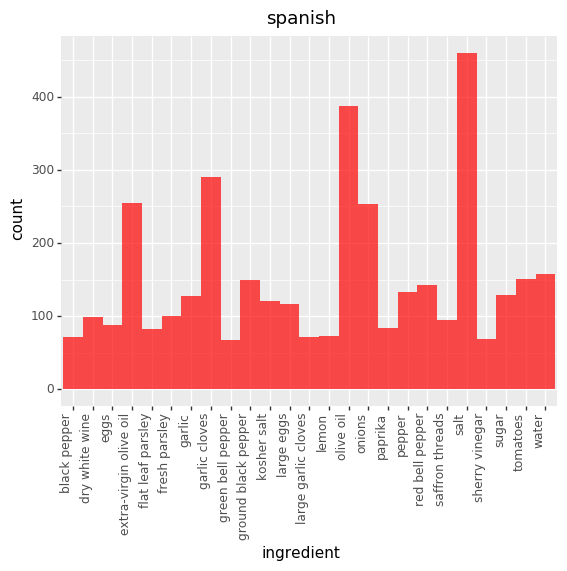

<ggplot: (8787753781769)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: spanish.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


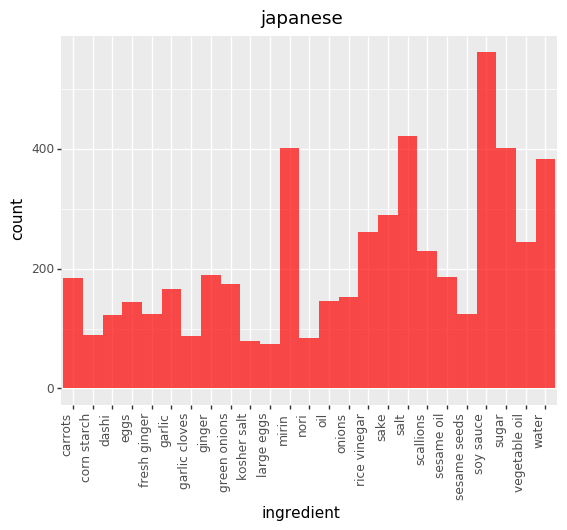

<ggplot: (8787753547249)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: japanese.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


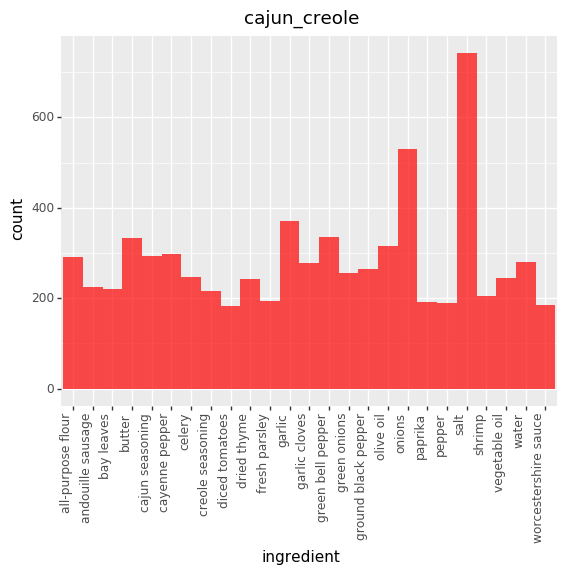

<ggplot: (8787753406253)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: cajun_creole.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


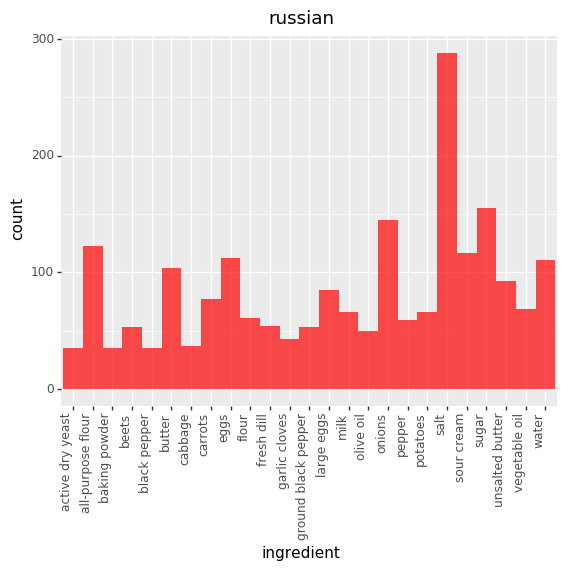

<ggplot: (8787753524405)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: russian.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


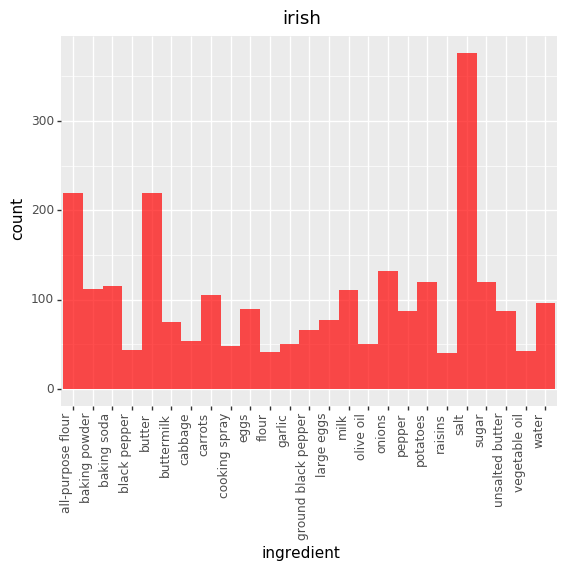

<ggplot: (8787753344865)>


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: irish.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


In [130]:
# helper function to plot top N
def plot_top_N(df, cuisine, N):
    # get all recipes for cusine
    cuisine_recipes = df.loc[recipes.cuisine == cuisine]
    
    # get top 25 ingredients for cuisine
    all_ingredients = []
    for ing_list in cuisine_recipes.ingredients:
        all_ingredients.extend(ing_list)
    top_ing = set([ele[0] for ele in Counter(all_ingredients).most_common(N)])
    all_ingredients = [ele for ele in all_ingredients if ele in top_ing]
    
    # plot ingridients
    ingredients = pd.DataFrame({'ingredient': [ele for ele in all_ingredients]})
    plot = (ggplot(data=ingredients,
           mapping=aes(x='ingredient'))
    + theme(axis_text_x=element_text(rotation=90, hjust=1))
    + ggtitle(cuisine)
    + geom_histogram(bins=N, fill='red', alpha=0.7))
    print(plot)
    ggsave(plot, f'{cuisine}.png', dpi=400)

# list cuisines
cuisines = set(recipes.cuisine)

# iterate over cuisines
for cuisine in cuisines:
    plot_top_N(recipes, cuisine, 25)
    
    
    


## Data cleaning

> From the histograms, it is evident that the most common ingredients are used by all cuisines and are likely not helpful to distinguish between them. We can also see a lot of ingredients that refer to the same thing (e.g. garlic vs. garlic cloves).

1. Merge ingredient names that refer to the same thing.
2. Get rid of ingredients that are too common and used across every cuisine.

### Merge equivalent ingredient names

In [5]:
# merge ingredient names that refer to the same thing
all_ingredients = []
for ing_list in recipes.ingredients:
    all_ingredients.extend(ing_list)
all_ingredients = set(all_ingredients)

# qualifiers that do not change meaning
qualifiers = set(['fresh','all-purpose', 'unsalted', 'large', 'small', 'cloves', 'diced', 
                  'chopped','minced', 'aged', 'pure'])
simple_key = {}
for ing in all_ingredients:
    
    # check if qualifiers were used
    new = ' '.join([ele for ele in ing.split(' ') if ele not in qualifiers]).strip()
    simple_key[ing] = new
        
# modify dataframe to include new names
ingredients_fixed = []
for idx, row in recipes.iterrows():
    ingredients_fixed.append([simple_key[ing] for ing in row['ingredients']])
recipes['ingredients'] = ingredients_fixed
    

    

    

### Get rid of ingredients that are prominent across all cuisines

In [6]:
# find all ingredients that are within top 35 in every cuisine
# list cuisines
cuisines = set(recipes.cuisine)
top_N = 35
top_ing = {}

# iterate over cuisines
for cuisine in cuisines:
    
    # get all recipes for cusine
    cuisine_recipes = recipes.loc[recipes.cuisine == cuisine]
    
    # get top 25 ingredients for cuisine
    all_ingredients = []
    for ing_list in cuisine_recipes.ingredients:
        all_ingredients.extend(ing_list)
    top_ing[cuisine] = list(set([ele[0] for ele in Counter(all_ingredients).most_common(top_N)]))
    
# get all ingredients from top 35 lists 
all_ing = []
for ele in top_ing:
    all_ing += top_ing[ele]

# find all ingridients that are top 35 of at least 17 / 20 cuisines
ing_counts = Counter(all_ing)
too_common = set([ele for ele in ing_counts if ing_counts[ele] > 17])
print(f'Common ingridients across all cuisines: {too_common}')

# modify dataframe to exclude common ingredients
ingredients_fixed = []
for idx, row in recipes.iterrows():
    ingredients_fixed.append([ele for ele in row['ingredients'] if ele not in too_common])
recipes['ingredients'] = ingredients_fixed

# drop rows with zero ingredients
recipes['n_ingredients'] = [len(ele) for ele in recipes.ingredients]
recipes = recipes.loc[recipes.n_ingredients != 0]
    


Common ingridients across all cuisines: {'water', 'garlic', 'salt', 'sugar', 'onions'}


### Histogram cleaned up data

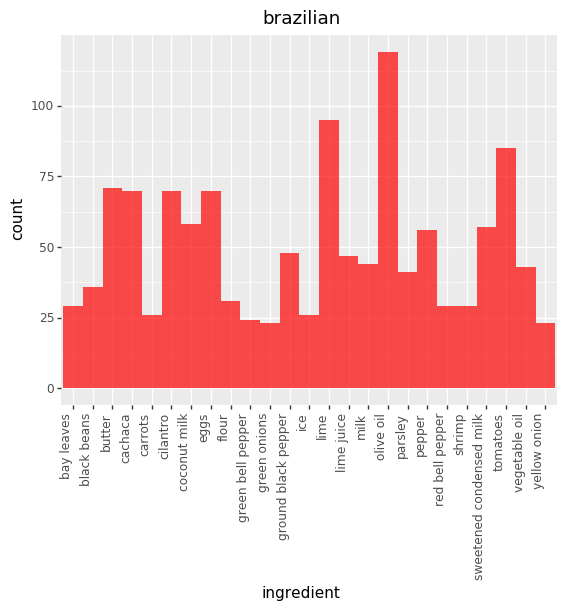

<ggplot: (8787817436805)>


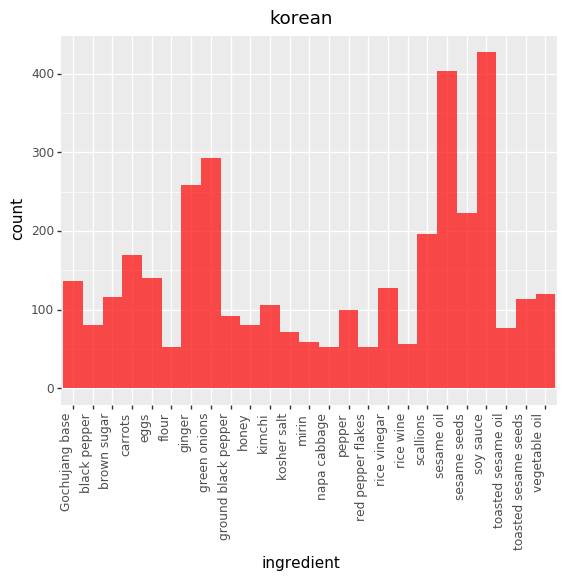

<ggplot: (8787817437401)>


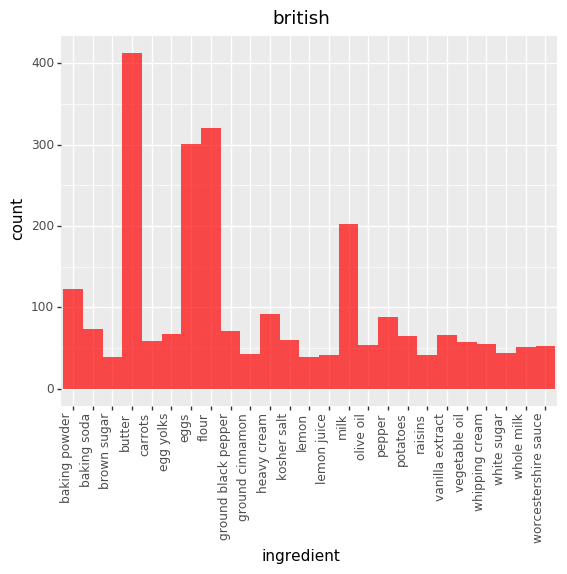

<ggplot: (8787817473325)>


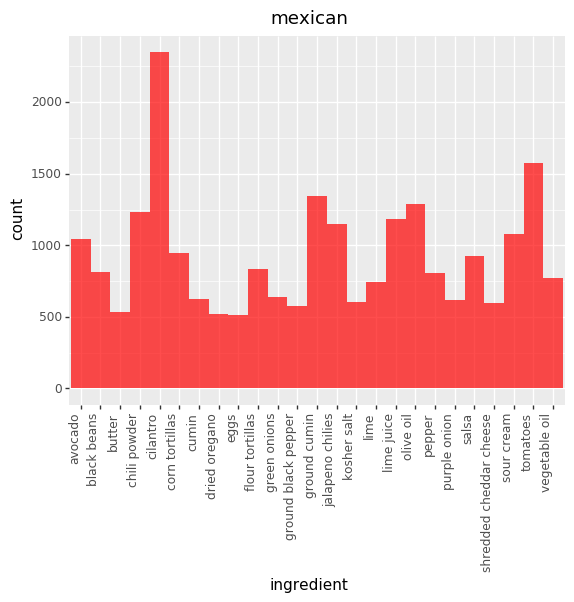

<ggplot: (8787817485901)>


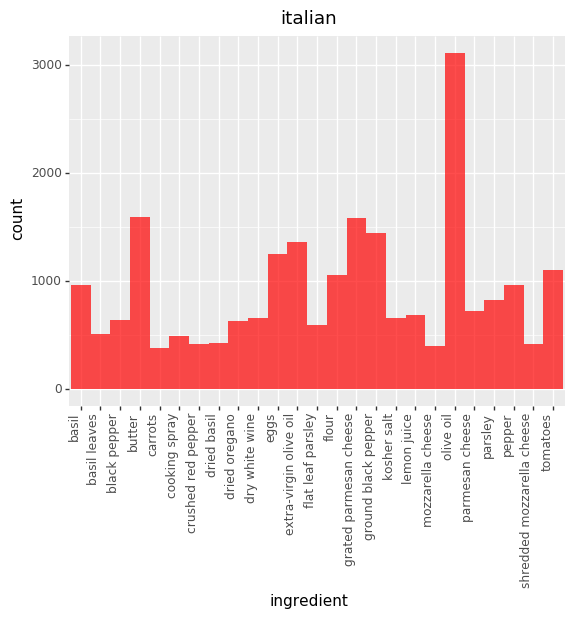

<ggplot: (8787817521125)>


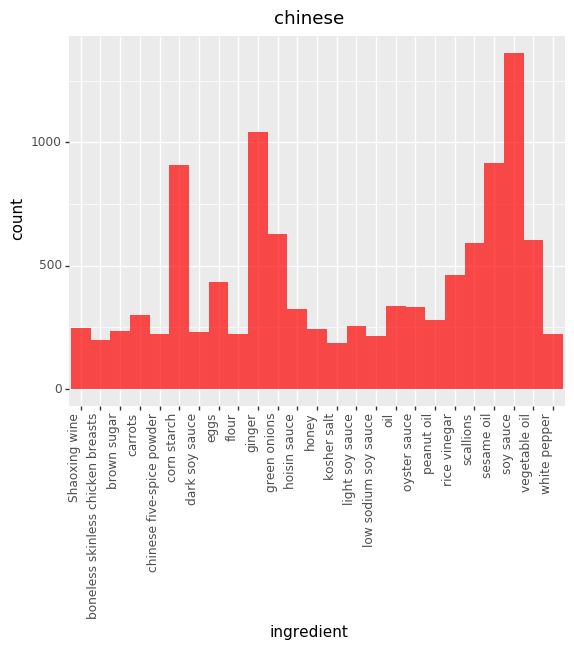

<ggplot: (8787817557613)>


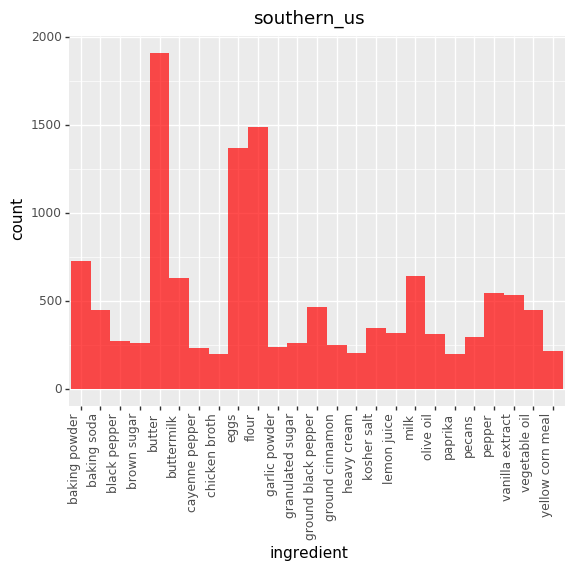

<ggplot: (8787817570345)>


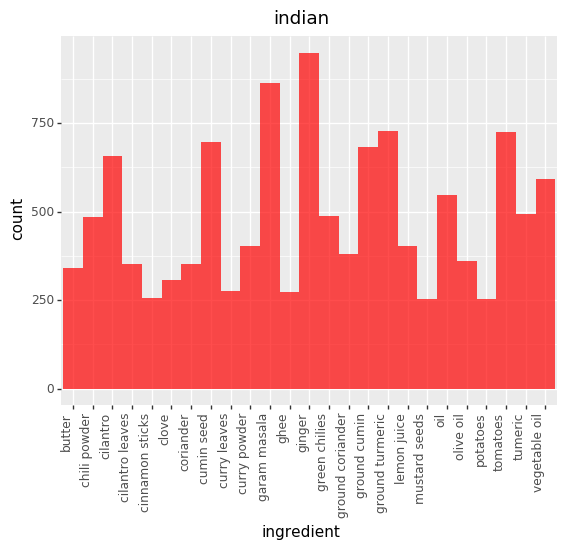

<ggplot: (8787817595041)>


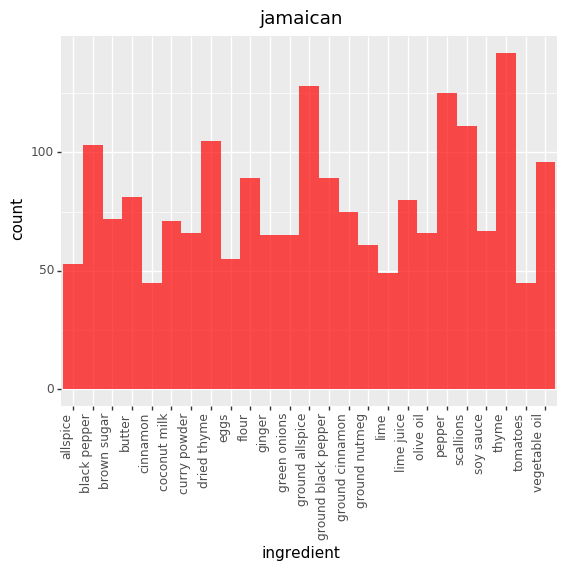

<ggplot: (8787817579689)>


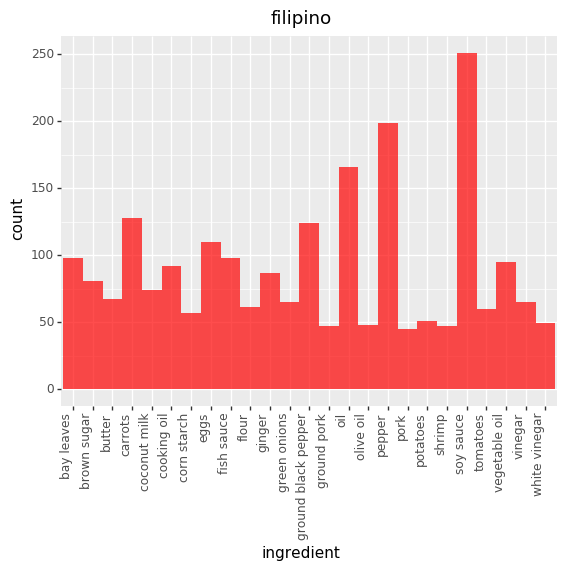

<ggplot: (8787817437861)>


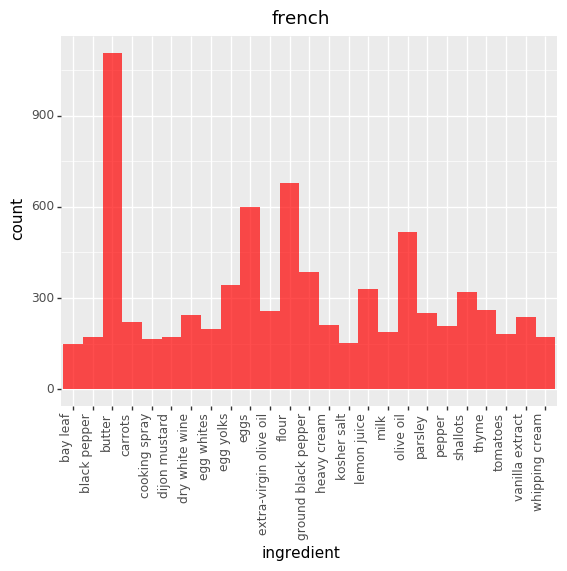

<ggplot: (8787817516865)>


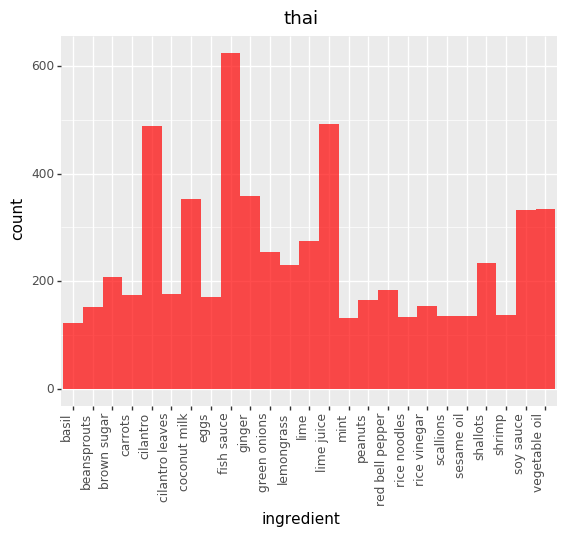

<ggplot: (8787817650573)>


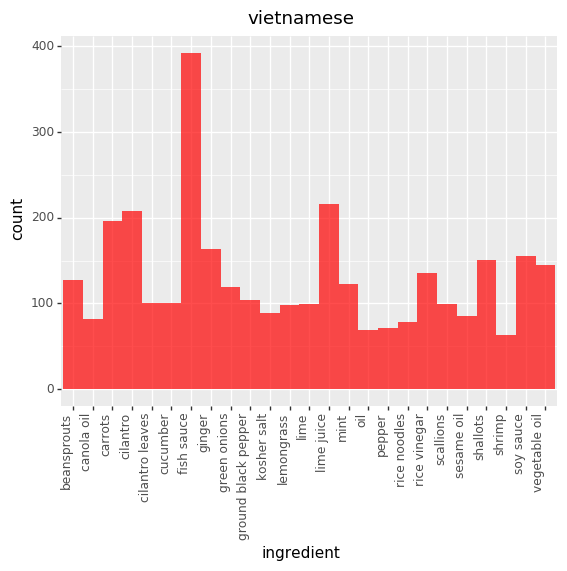

<ggplot: (8787817660521)>


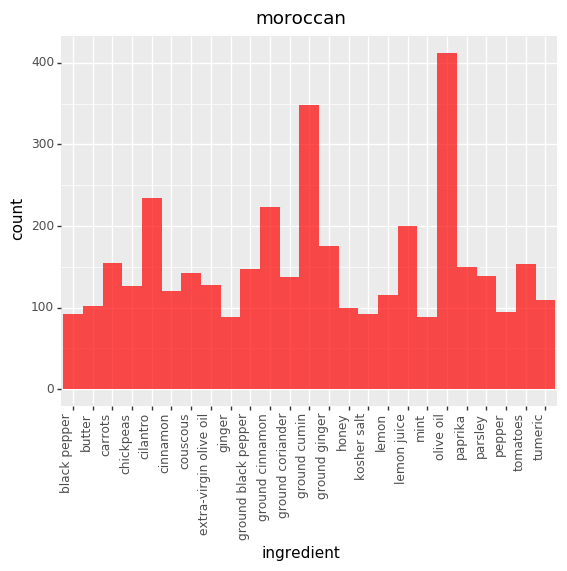

<ggplot: (8787817702089)>


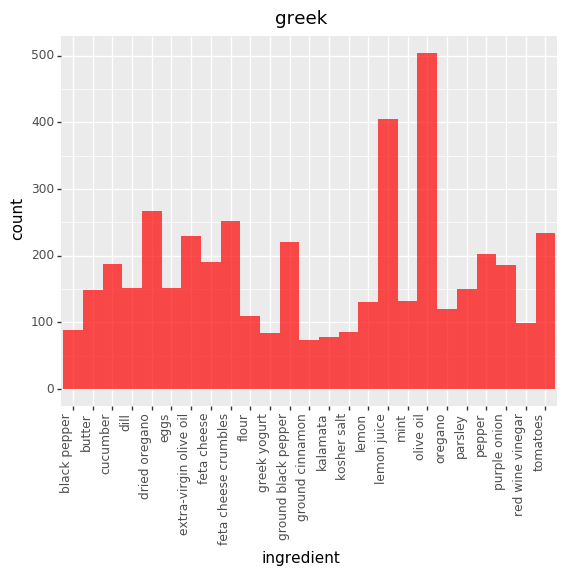

<ggplot: (8787817711269)>


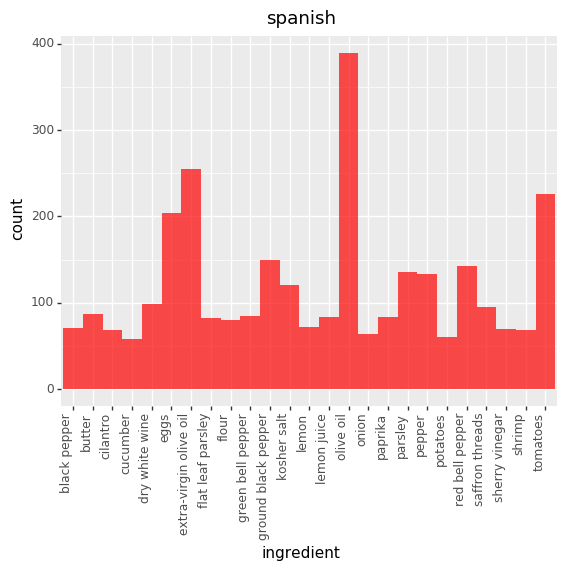

<ggplot: (8787817766169)>


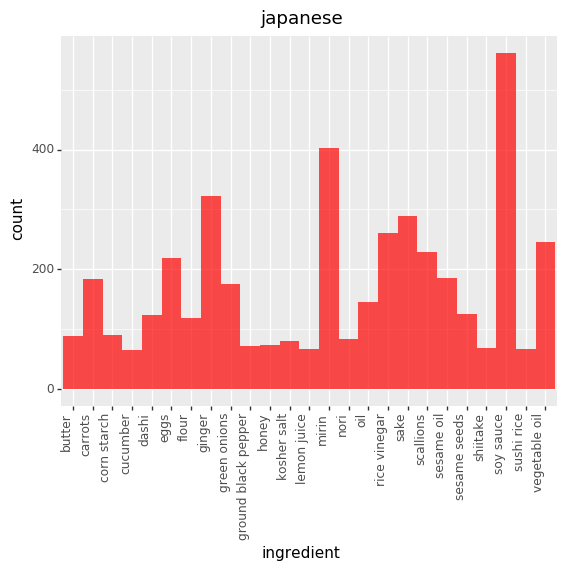

<ggplot: (8787817752061)>


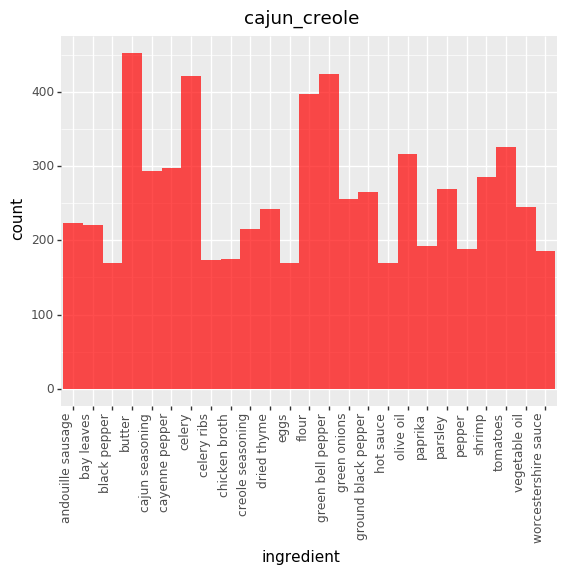

<ggplot: (8787817801013)>


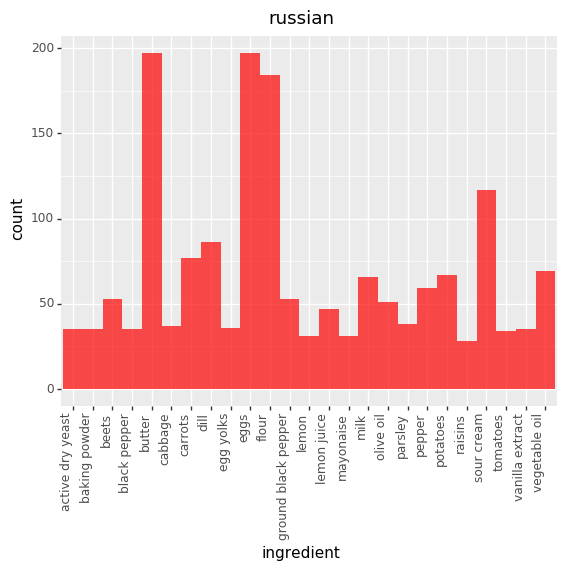

<ggplot: (8787817831977)>


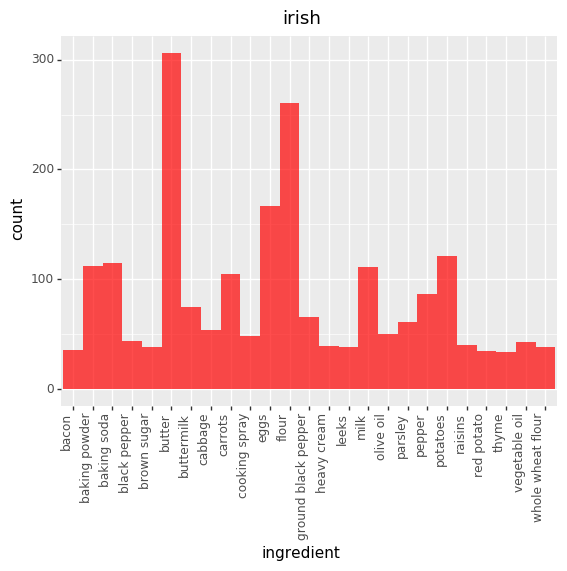

<ggplot: (8787817827397)>


In [7]:
for cuisine in cuisines:
    plot_top_N(recipes, cuisine, 25)

## Minimum Viable Model

1. Get sentence embeddings for recipes
2. Train a one vs. all SVM on embeddings

### Preprocess data

In [31]:
import sister
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# set random seed for numpy
np.random.seed(42)

# takes the element-wise mean embedding for all words in the sentence, sister uses fastText
embedder = sister.MeanEmbedding(lang="en")

# get embeddings and targets for all recipes
embeddings = np.array([embedder(' '.join([word for word in ele])) for ele in recipes.ingredients])
label_map = {ele: idx for idx, ele in enumerate(set(recipes.cuisine))}
target_labels = np.array([label_map[ele] for ele in recipes.cuisine])

# shuffle embeddings and labels
random_order = np.random.choice(range(len(target_labels)), len(target_labels), replace=False)
embeddings = embeddings[random_order, :]
target_labels = target_labels[random_order]

# separate between training and validation
X_train, X_val, y_train, y_val = train_test_split(embeddings, target_labels, random_state=0, test_size=0.2)

print('Finished loading sentence enbeddings')

Loading model...


Finished loading sentence enbeddings


### Train model

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

# train classifier and get predictions
classifier = LogisticRegression(multi_class="auto", n_jobs=-1)
classifier.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Plot confusion matrix

/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


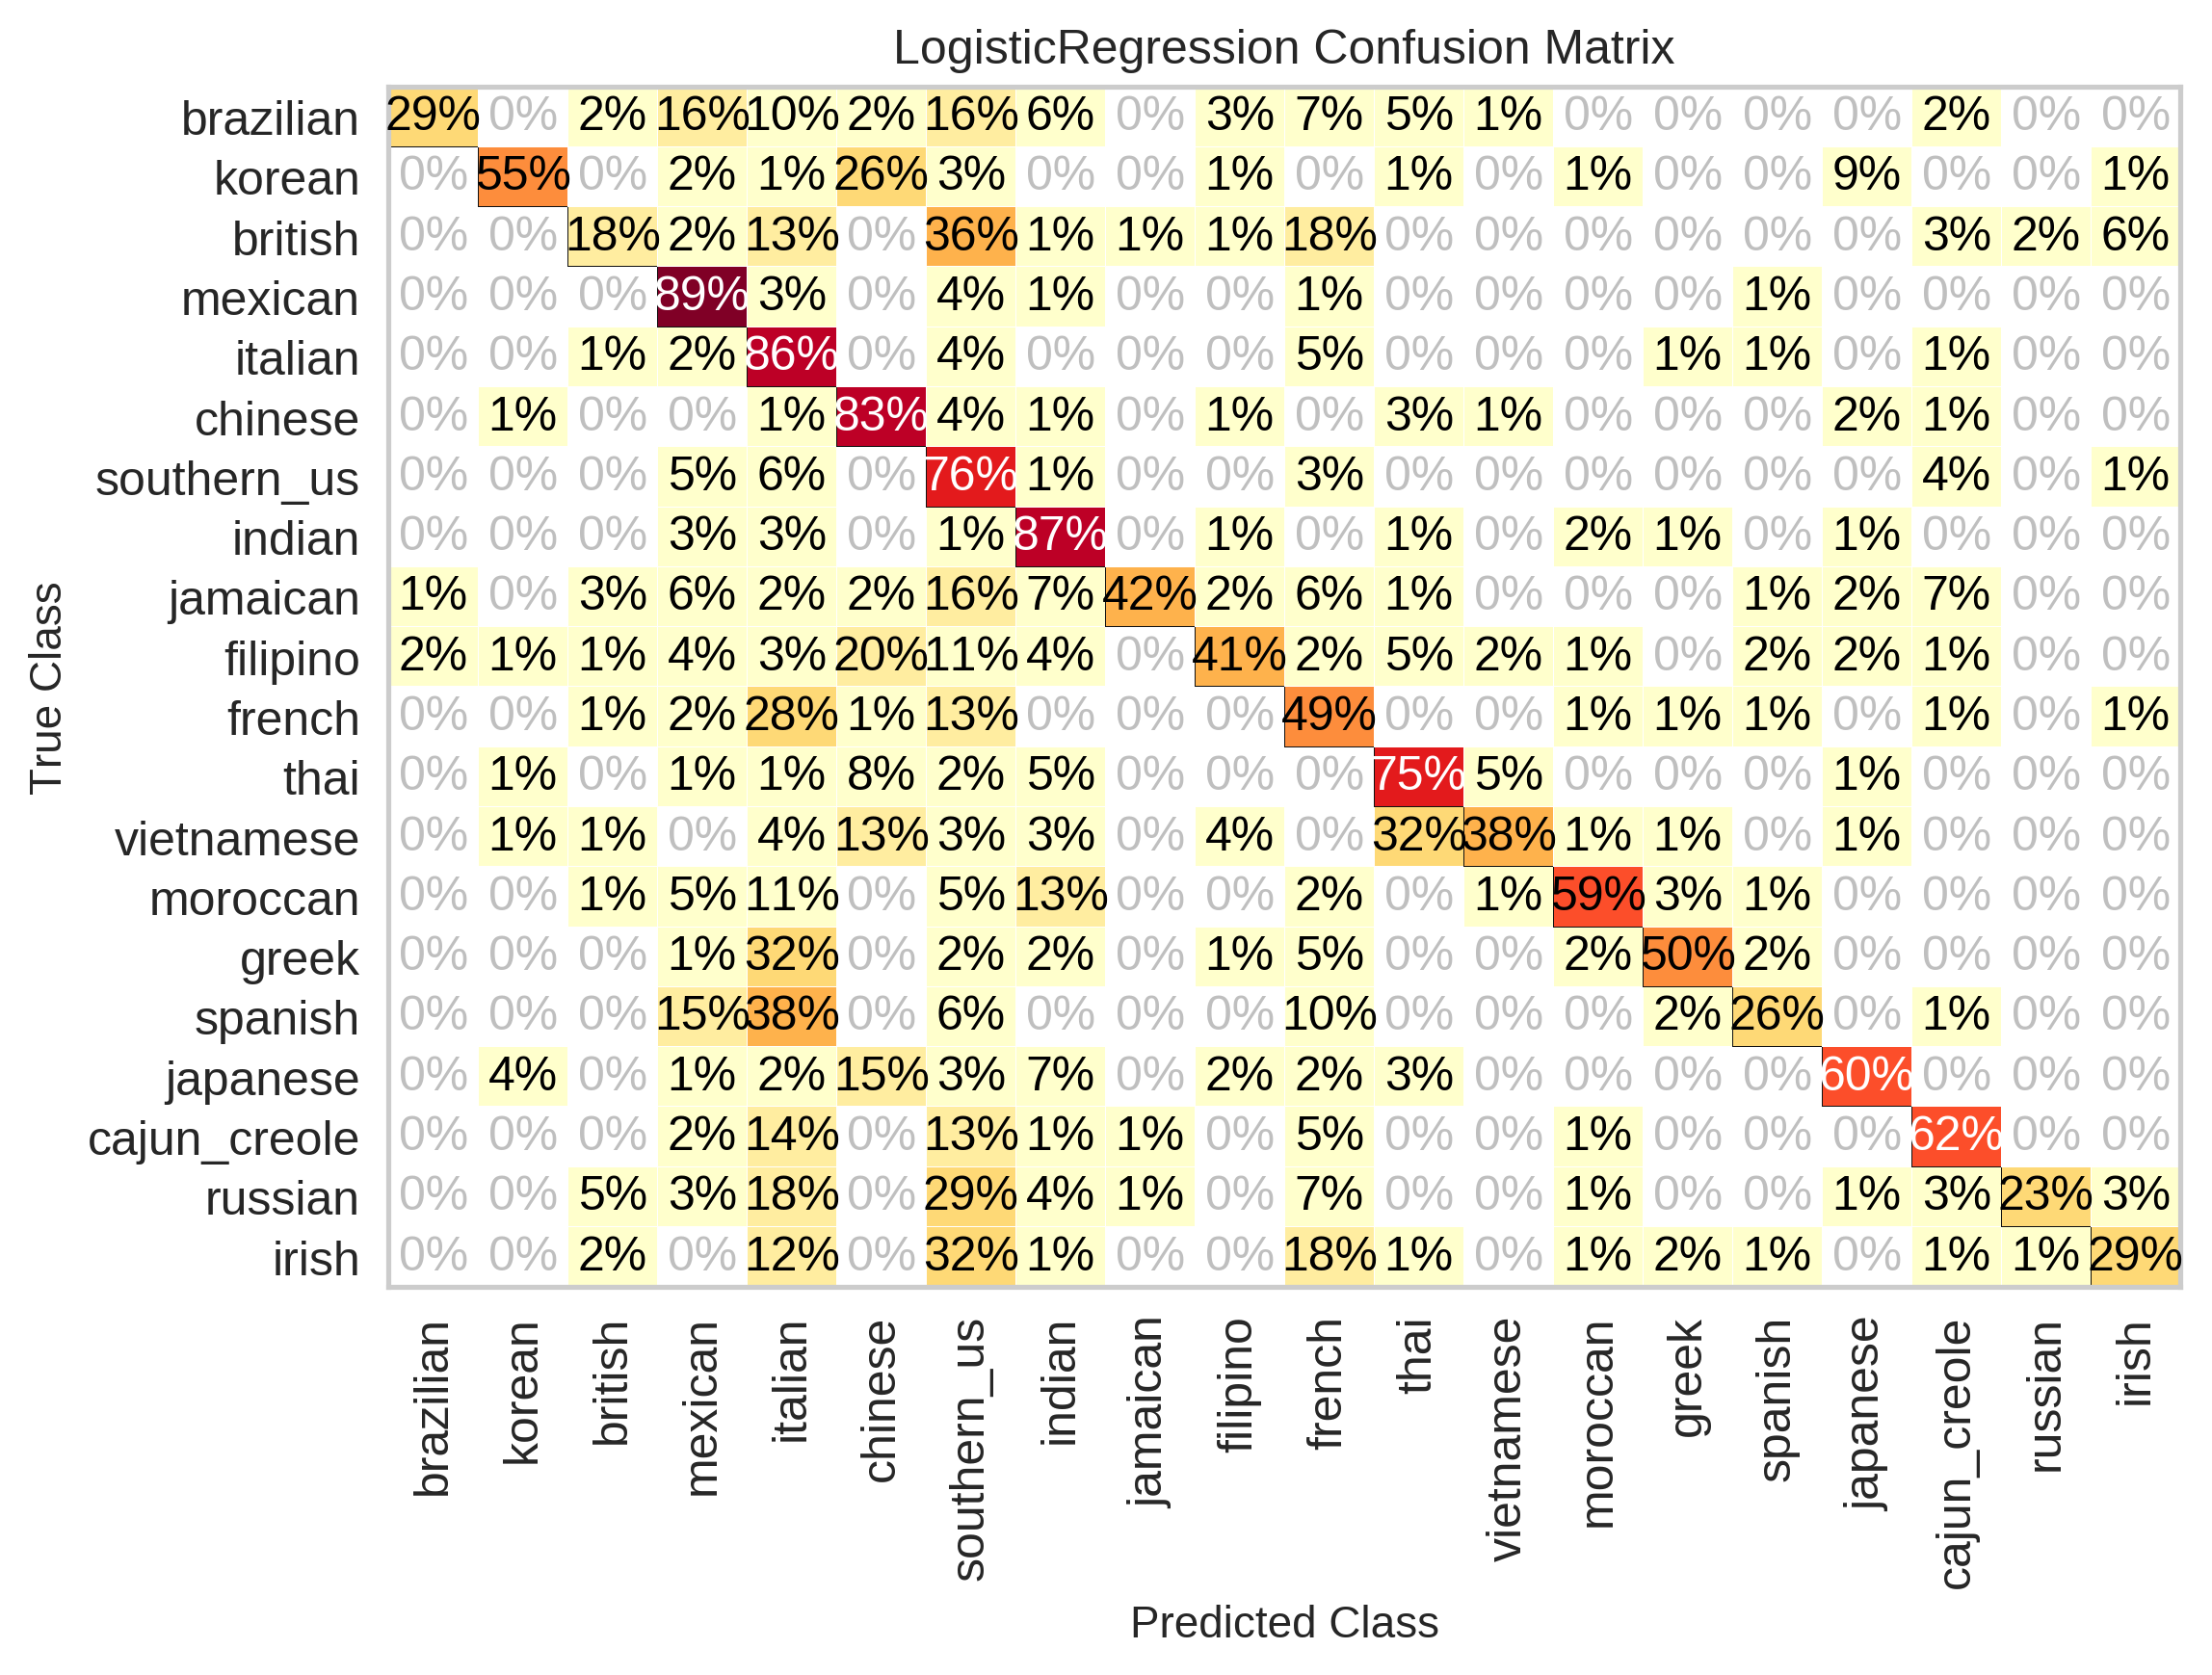

In [114]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(classifier, classes=list(label_map.keys()), 
                     label_encoder = {idx: ele for idx, ele in enumerate(label_map.keys())},
                     percent=True)
                     
cm.score(X_val, y_val)
cm.show()


### Get balanced class accuracy

In [123]:
def get_balanced_acc(classifier, x, y, n_labels):
    y_pred = classifier.predict(x)
    acc = []
    for idx in range(n_labels):
        idcs = [y == idx]
        acc.append(sum(y_pred[idcs] == y[idcs]) / np.sum(idcs))
    print('balanced class accuracy: ', np.mean(acc))

get_balanced_acc(classifier, X_val, y_val, 20)

balanced class accuracy:  0.5389283510213849


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


## Potential problems, where it fails

### Assessment
> Cuisines with more recipes (Italian, Chinese, Mexican, Southern US, Indian) are absorbing smaller cuisines. Need to deal with class imbalance. 


### Improvements

1. Deal with unbalanced class sizes
2. Do some feature engineering
3. Use model with non-linearities
4. Tune hyperparameters

## Train feed forward neural network

### Create balanced mini-batches

In [ ]:
# create balanced class mini-batches
cuisine_counts = Counter(recipes.cuisine)
probs = {}
for cuisine in cuisines:
    probs[cuisine] = 1 / (len(cuisines) * cuisine_counts[cuisine])

row_probs = np.array([probs[recipes.iloc[idx]['cuisine']] for idx in range(len(y_train))])
row_probs = row_probs / sum(row_probs)
    
def sample_batch(batch_size = 256):
    rows = np.random.choice(range(len(y_train)), batch_size, p=row_probs)
    return X_train[rows, :], y_train[rows]
    

### Train classifier

In [125]:
from sklearn.neural_network import MLPClassifier

# set number of iterations
n_iters = 2500
batch_size = 1024

# train classifier and get predictions
classifier = MLPClassifier(hidden_layer_sizes=(500, 500))
for step in range(n_iters):
    X_batch, y_batch = sample_batch(batch_size)
    classifier.partial_fit(X_batch, y_batch, classes=np.unique(y_train))
    if step % 50 == 0:
        print(step)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450


### Plot confusion matrix

/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


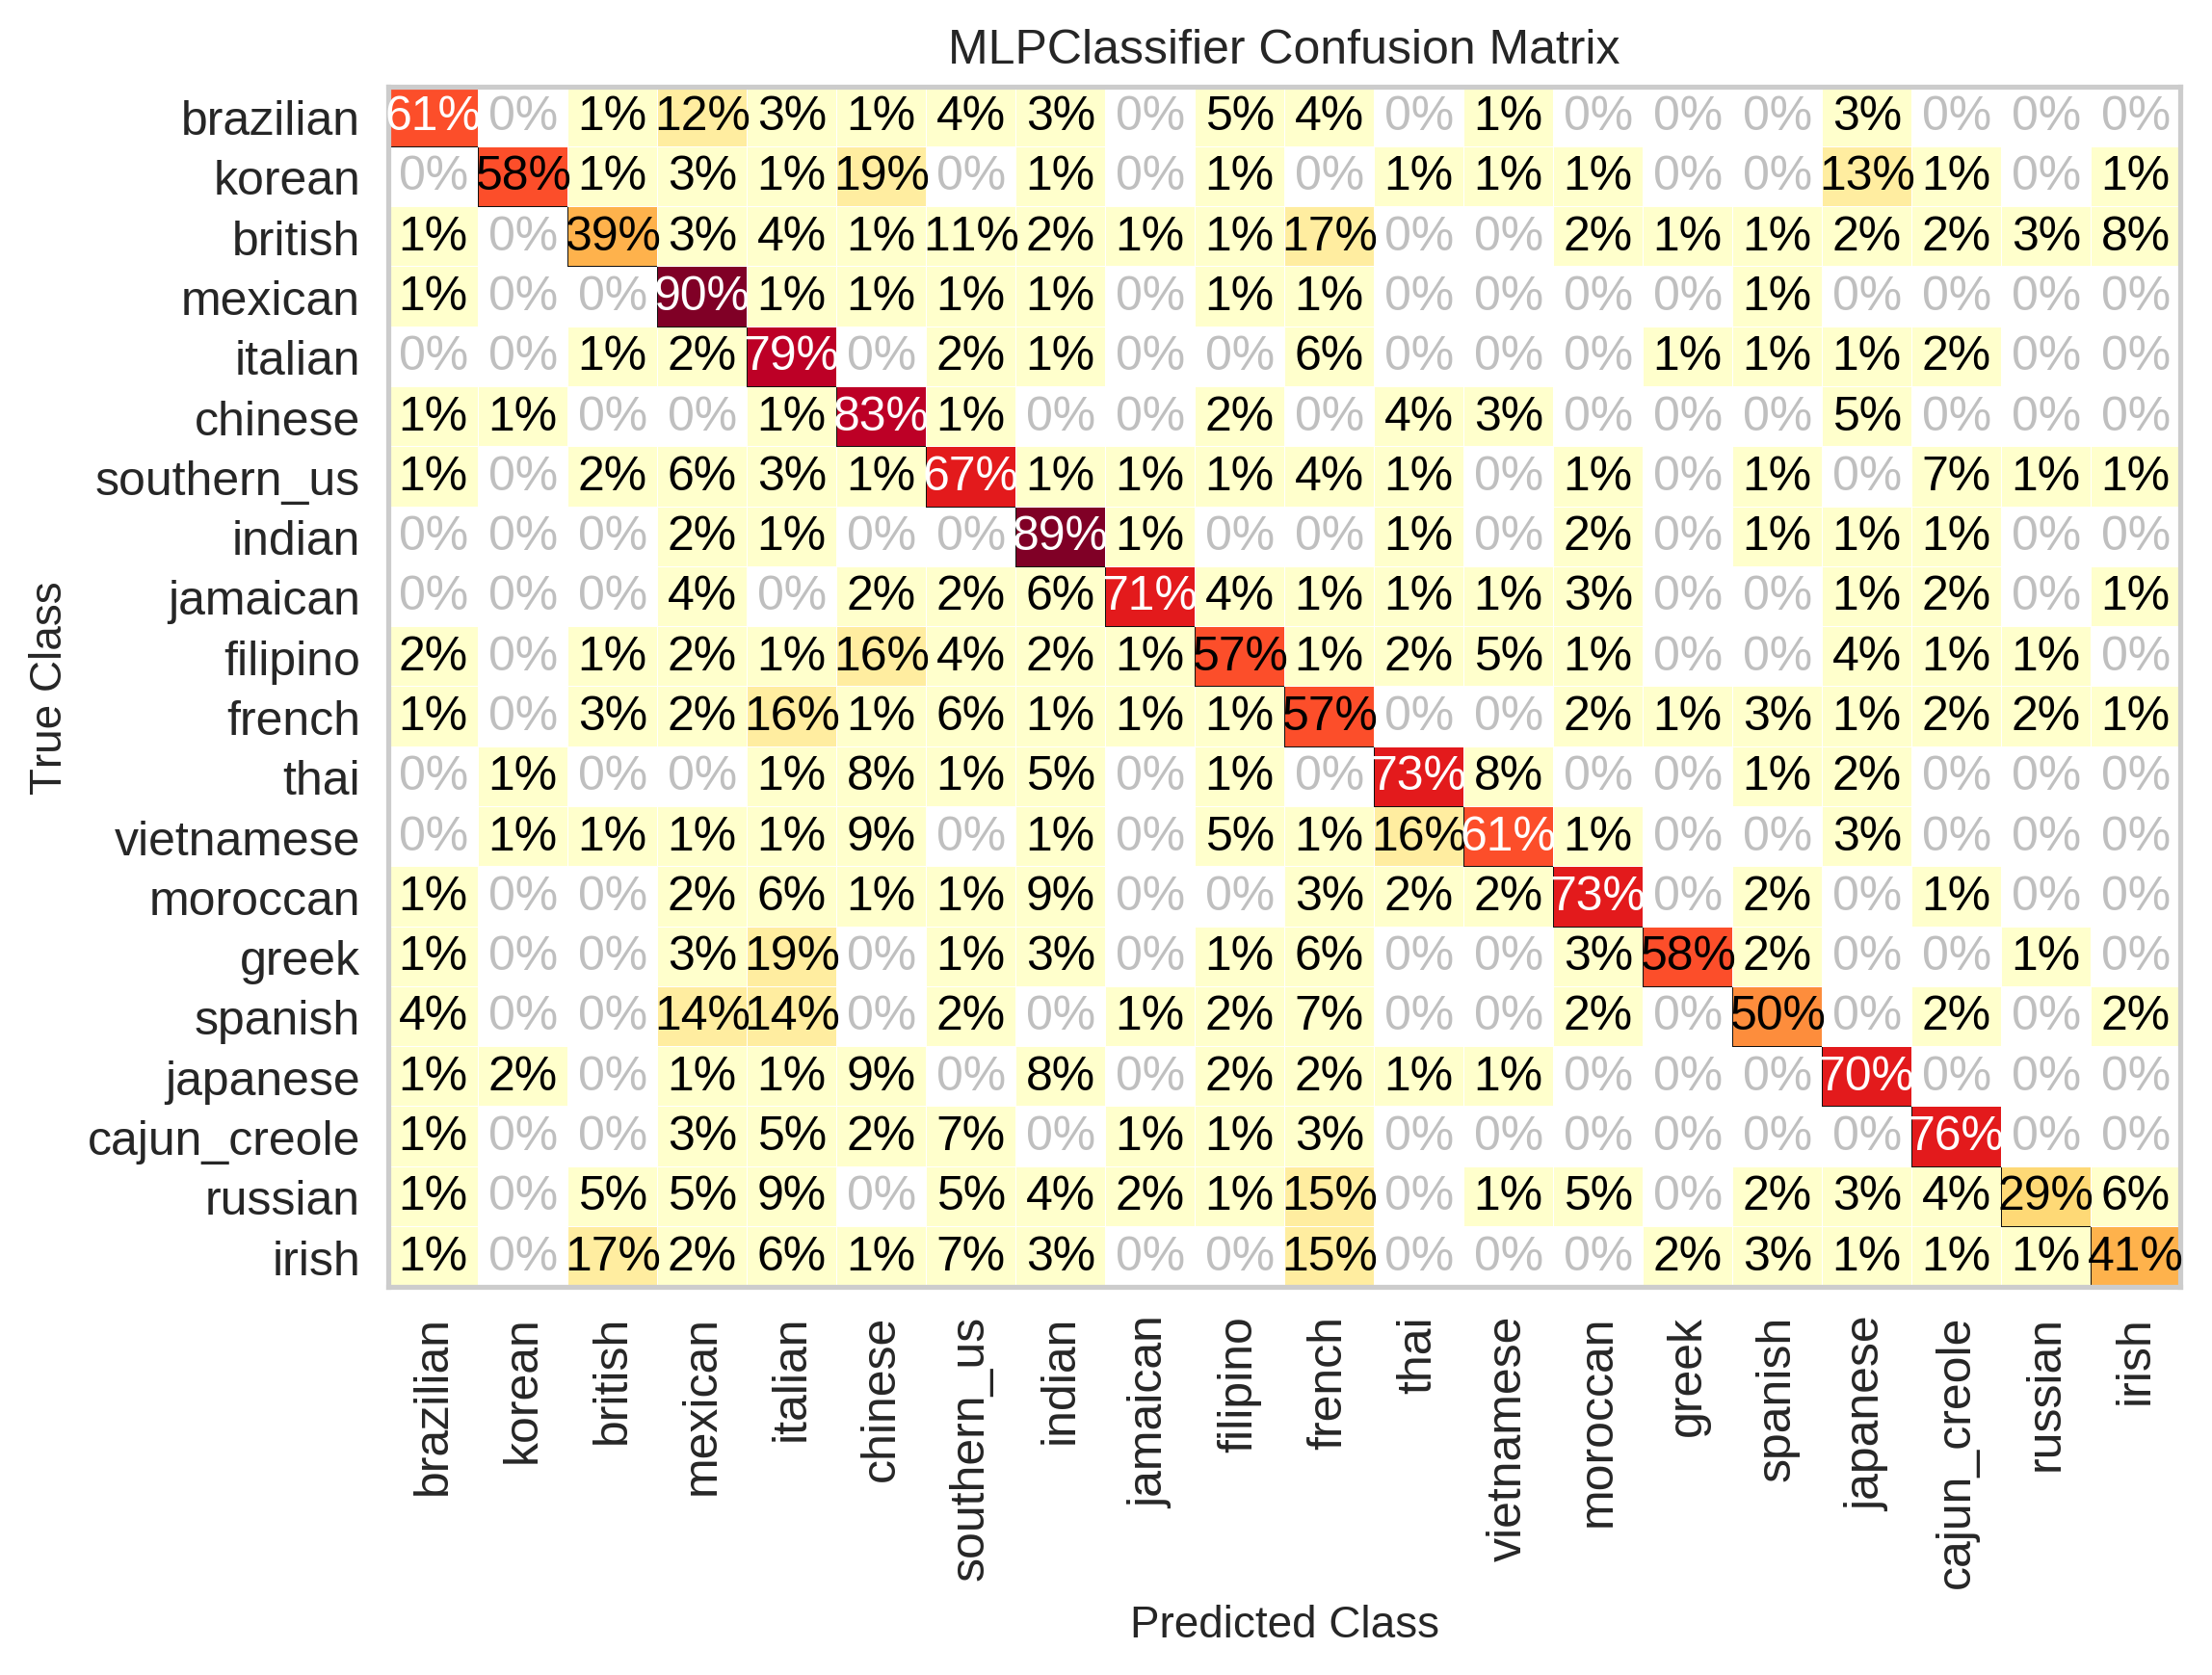

In [126]:
cm = ConfusionMatrix(classifier, classes=list(label_map.keys()), 
                     label_encoder = {idx: ele for idx, ele in enumerate(label_map.keys())},
                     percent=True)
                     
cm.score(X_val, y_val)
cm.show()


### Get balanced class accuracy

In [127]:
get_balanced_acc(classifier, X_val, y_val, 20)

balanced class accuracy:  0.6413507407505253


/home/bento/anaconda3/envs/recipes/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


## Conclusion
> Balanced class accuracy went up ~10% dealing with class imbalance